# Analysis of pre-processed data from Tilman's gap crossing silencing screen
* 113 lines tested; collection contains parental control and for some lines multiple effectors (Shibire, TNT) in different genetic backgrounds.
* 3 gap sizes were used (3.5, 4.0, 5.0 mm). Earlier in the screen, only gap sizes 3.5 and 5 were tested, later 3.5 and 4.

In [7]:
import scipy.io as sio
import numpy as np
from os.path import sep
from os import mkdir, makedirs, getcwd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, FancyArrow

from gapCrossingAnalysisFunctions import *

## Load pre-processed data (dataGC.mat)
### Data assumed to be located in ../data/ folder relative to code directory

In [2]:
parentDir = sep.join(getcwd().split(sep)[:-1])
dataDir = parentDir+sep+'data'
dataDir

'/Users/haberkernh/Desktop/Triphan_et_al_Manuscript/data'

In [3]:
matstruct = sio.loadmat(dataDir+sep+'dataGC.mat')
matstruct.keys()

dict_keys(['__header__', '__version__', '__globals__', 'dataGC'])

In [4]:
matdata = matstruct['dataGC']

ngts = len(matdata)
print('Dataset consists of {} genotypes\n'.format(ngts))

print('For each genotype the following parameters are reported:')
print(matdata[0,][0].dtype)

Dataset consists of 113 genotypes

For each genotype the following parameters are reported:
[('genotype', 'O'), ('linename', 'O'), ('effector', 'O'), ('ax', 'O'), ('ay', 'O'), ('hx', 'O'), ('hy', 'O'), ('ang', 'O'), ('gap', 'O'), ('fly', 'O')]


In [5]:
genotypedata = matdata[0][0]
print(genotypedata[0])
print(sum(~np.isnan(genotypedata[3])))
print(sum(~np.isnan(genotypedata[8])))
print(sum(~np.isnan(genotypedata[9])))
print(set(genotypedata[8][~np.isnan(genotypedata[8])].flatten()))

['FCF_SHI']
[113]
[33]
[33]
{3.5, 5.0}


## Illustrate behavioural phenotypes using some example genotypes
### (a) Vector plot

### TODO: Once Tilman provides correctly parsed data, all following analysis needs to be conditioned to the gap size

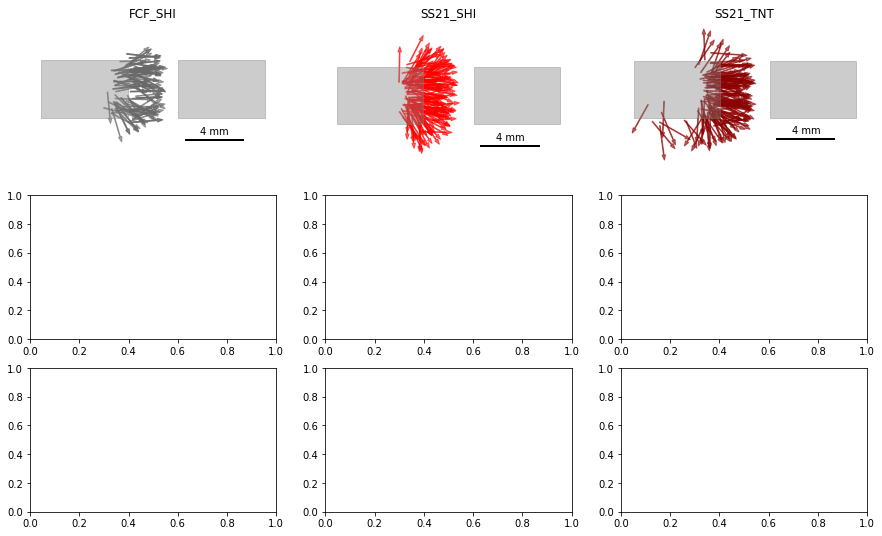

In [20]:
genotypeslct = [0,4,6]

cols = ['dimgrey', 'red', 'darkred']

# find gap sizes
gapsizes = []
for i, genotype in enumerate(genotypeslct):
    genotypedata = matdata[genotype][0]
    gapsizes +=(list(set(genotypedata[8][~np.isnan(genotypedata[8])].flatten())))
gapsizes = list(set(gapsizes))

# plot results
fig, axs = plt.subplots(len(gapsizes),len(genotypeslct), figsize=(15,3*len(gapsizes)))

#TODO: make this an intterable...
gapsize = 3.5
g = 0
for i, genotype in enumerate(genotypeslct):
    genotypedata = matdata[genotype][0]
    
    plotClimbingVector(genotypedata, axs[g, i], gapsize)
    
    axs[g, i].set_xlim(-5, 8)
    axs[g, i].set_ylim(-3, 7)
    axs[g, i].set_title(genotypedata[0][0])
    reducedAxis(axs[g, i], [-1.5,4,4], 'mm')

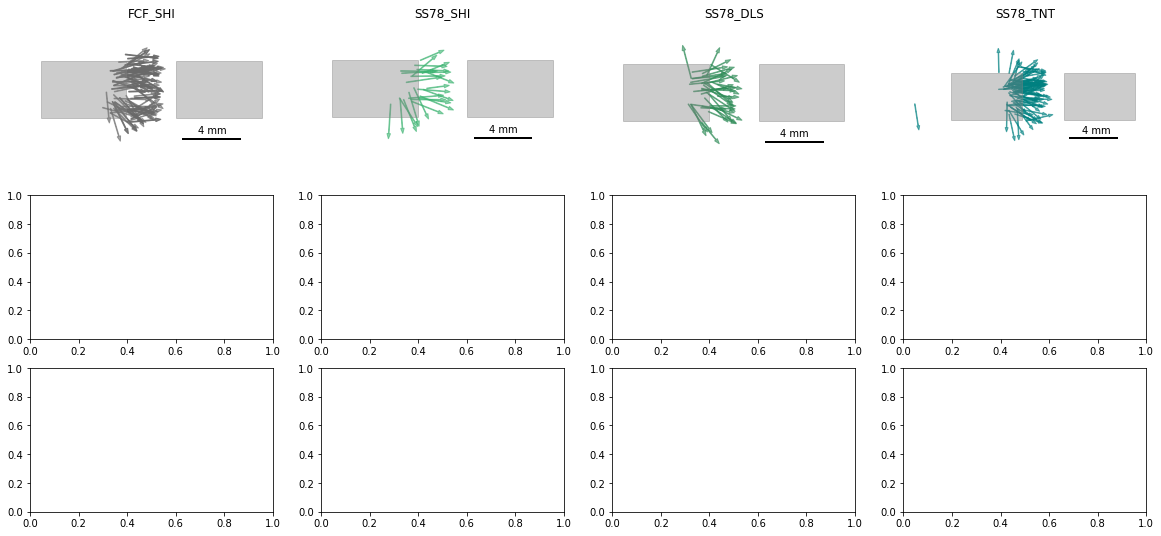

In [21]:
genotypeslct = [0,20, 21, 22]

cols = ['dimgrey', 'mediumseagreen', 'seagreen', 'teal']

# find gap sizes
gapsizes = []
for i, genotype in enumerate(genotypeslct):
    genotypedata = matdata[genotype][0]
    gapsizes +=(list(set(genotypedata[8][~np.isnan(genotypedata[8])].flatten())))
gapsizes = list(set(gapsizes))

# plot results
fig, axs = plt.subplots(len(gapsizes),len(genotypeslct), figsize=(20,3*len(gapsizes)))

#TODO: make this an intterable...
gapsize = 3.5
g = 0
for i, genotype in enumerate(genotypeslct):
    genotypedata = matdata[genotype][0]
    
    plotClimbingVector(genotypedata, axs[g, i], gapsize)

    axs[g, i].set_xlim(-5, 8)
    axs[g, i].set_ylim(-3, 7)
    axs[g, i].set_title(genotypedata[0][0])
    reducedAxis(axs[g, i], [-1.5,4,4], 'mm')

### (b) Distribution of body orientations during climps and (c) fraction of "off-target" climbs

In [11]:
# Define a cutoff angle for "off-target climbing events"
offtarget_ang = 45

FCF_SHI, n=113
SS21_SHI, n=144
SS21_TNT, n=140


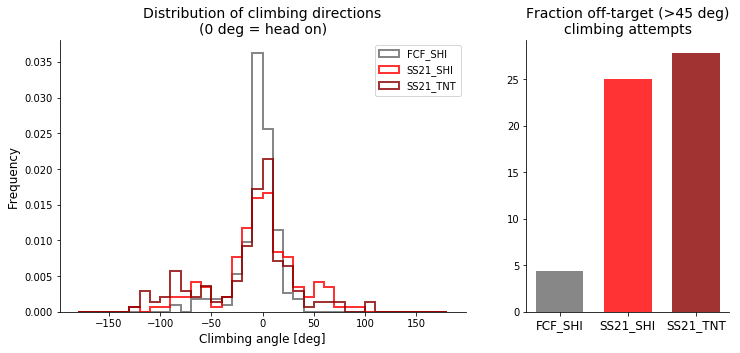

In [12]:
genotypeslct = [0,4, 6]
fig, axs = plt.subplots(1,2, figsize=(12,5), gridspec_kw={'width_ratios':[2,1]})

cols = ['dimgrey', 'red', 'darkred']
offtarget_attempts = np.zeros(len(genotypeslct))

for i, genotype in enumerate(genotypeslct):
    genotypedata = matdata[genotype][0]
    print('{}, n={}'.format(genotypedata[0][0],len(genotypedata[5])))
    
    
    axs[0].hist(genotypedata[7], range=(-180, 180), density=True, histtype='step',
             bins=36, linewidth=2, label=genotypedata[0][0], alpha=0.8, color=cols[i])
    
    clang = genotypedata[7]
    offtarget_attempts[i] = 100*(sum(abs(clang)>offtarget_ang)/len(clang))
    

axs[1].bar(np.arange(3), offtarget_attempts, 0.7, color=cols, alpha=0.8)
plt.xticks(np.arange(3), [matdata[genotype][0][0][0] for genotype in genotypeslct],fontsize=12)

axs[0].legend()
axs[0].set_xlabel('Climbing angle [deg]', fontsize=12)
axs[0].set_ylabel('Frequency', fontsize=12)
axs[0].set_title('Distribution of climbing directions\n(0 deg = head on)', fontsize=14)

axs[1].set_title('Fraction off-target (>45 deg)\nclimbing attempts', fontsize=14)

for ax in axs:
    myAxisTheme(ax)

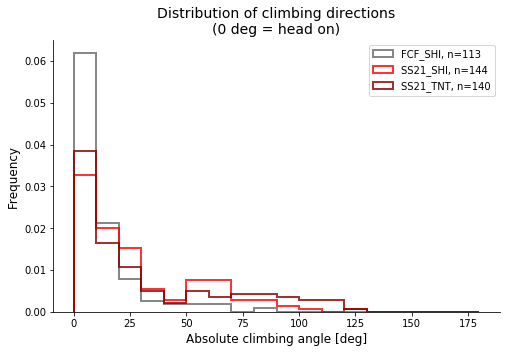

In [13]:
genotypeslct = [0,4,6]
fig, axs = plt.subplots(1,1, figsize=(8,5))

cols = ['dimgrey', 'red', 'darkred']
offtarget_attempts = np.zeros(len(genotypeslct))

for i, genotype in enumerate(genotypeslct):
    genotypedata = matdata[genotype][0]
    axs.hist(abs(genotypedata[7]), range=(0, 180), density=True, histtype='step',
             bins=18, linewidth=2, label='{}, n={}'.format(genotypedata[0][0],len(genotypedata[5])),
             alpha=0.8, color=cols[i], align='mid')
    
    clang = genotypedata[7]
    offtarget_attempts[i] = 100*(sum(abs(clang)>offtarget_ang)/len(clang))
    
axs.legend()
axs.set_xlabel('Absolute climbing angle [deg]', fontsize=12)
axs.set_ylabel('Frequency', fontsize=12)
axs.set_title('Distribution of climbing directions\n(0 deg = head on)', fontsize=14)
myAxisTheme(axs)

FCF_SHI, n=113
SS78_SHI, n=25
SS78_DLS, n=37
SS78_TNT, n=81


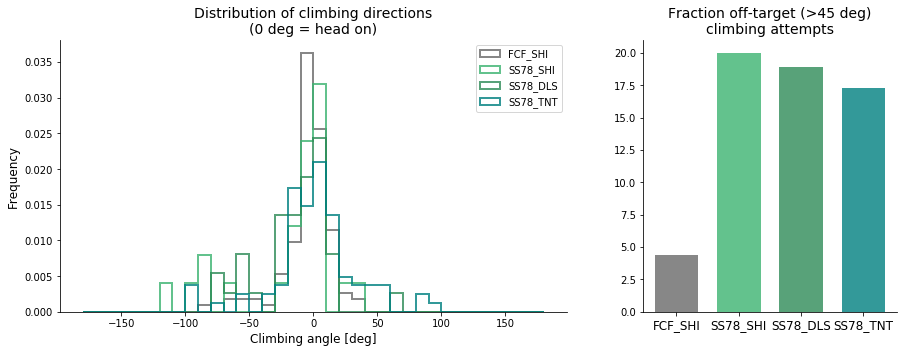

In [14]:
genotypeslct = [0,20,21,22]
fig, axs = plt.subplots(1,2, figsize=(15,5), gridspec_kw={'width_ratios':[2,1]})

cols = ['dimgrey', 'mediumseagreen', 'seagreen', 'teal']
offtarget_attempts = np.zeros(len(genotypeslct))

for i, genotype in enumerate(genotypeslct):
    genotypedata = matdata[genotype][0]
    print('{}, n={}'.format(genotypedata[0][0],len(genotypedata[5])))
    
    
    axs[0].hist(genotypedata[7], range=(-180, 180), density=True, histtype='step',
             bins=36, linewidth=2, label=genotypedata[0][0], alpha=0.8, color=cols[i])
    
    clang = genotypedata[7]
    offtarget_attempts[i] = 100*(sum(abs(clang)>offtarget_ang)/len(clang))
    

axs[1].bar(np.arange(len(genotypeslct)), offtarget_attempts, 0.7, color=cols, alpha=0.8)
plt.xticks(np.arange(len(genotypeslct)), [matdata[genotype][0][0][0] for genotype in genotypeslct],fontsize=12)

axs[0].legend()
axs[0].set_xlabel('Climbing angle [deg]', fontsize=12)
axs[0].set_ylabel('Frequency', fontsize=12)
axs[0].set_title('Distribution of climbing directions\n(0 deg = head on)', fontsize=14)

axs[1].set_title('Fraction off-target (>45 deg)\nclimbing attempts', fontsize=14)

for ax in axs:
    myAxisTheme(ax)

In [15]:
driverset = []
for genotype in range(113): # 0-112
    genotypedata = matdata[genotype][0]

    print('{}, n={}'.format(genotypedata[0][0],len(genotypedata[5])))
    driverset.append(genotypedata[1][0])
driverset = list(set(driverset))

FCF_SHI, n=113
FCF_DLS, n=73
FCF_TNT, n=128
SS007_DLS, n=47
SS21_SHI, n=144
SS21_KIR, n=118
SS21_TNT, n=140
SS33_DLS, n=59
SS33_SHI, n=97
SS33_TNT, n=95
SS44_DLS, n=81
SS52_DLS, n=62
SS52_SHI, n=95
SS52_TNT, n=45
SS57_DLS, n=45
SS62_DLS, n=67
SS62_TNT, n=44
SS72_DLS, n=47
SS72_SHI, n=57
SS72_TNT, n=39
SS78_SHI, n=25
SS78_DLS, n=37
SS78_TNT, n=81
SS79_DLS, n=78
SS80_DLS, n=77
SS80_TNT, n=76
SS81_DLS, n=99
SS82_DLS, n=47
SS87_DLS, n=73
SS90_DLS, n=68
SS90_TNT, n=74
SS93_DLS, n=71
SS93_SHI, n=96
SS93_TNT, n=74
SS95_DLS, n=83
SS96_DLS, n=63
SS96_TNT, n=80
SS97_DLS, n=68
SS98_DLS, n=41
SS98_SHI, n=73
SS98_TNT, n=136
SS116_DLS, n=69
SS119_DLS, n=60
SS130_DLS, n=73
SS131_DLS, n=55
SS132_DLS, n=78
SS138_SHI, n=54
SS144_DLS, n=58
SS152_SHI, n=118
SS152_TNT, n=132
SS153_DLS, n=61
SS155_DLS, n=46
SS161_SHI, n=103
SS161_TNT, n=38
SS168_DLS, n=59
SS169_DLS, n=46
SS179_DLS, n=65
SS191_DLS, n=71
SS191_SHI, n=72
SS191_TNT, n=55
SS193_DLS, n=71
SS194_DLS, n=63
SS208_SHI, n=41
SS208_TNT, n=25
SS216_DLS,

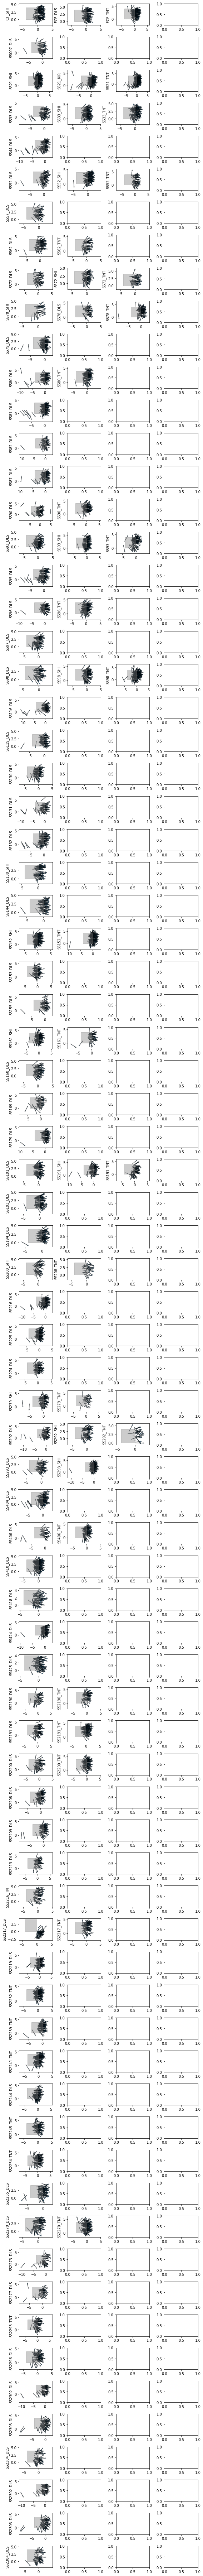

In [287]:
# NOTE: Data from one driver might be duplicated or the list is not cleanly sorted, i.e.
# there is data from driver A, then from B and then from A again.
# E.g. SS2304_DLS appears to be duplicated.

fig, axs = plt.subplots(len(driverset)+3,4, figsize=(8,100))

# plot each driver-genotype in one row
px = 0
py = 0
driver = matdata[0][0][1][0]

for i in range(ngts):
    genotypedata = matdata[i][0]
    
    if driver != genotypedata[1][0]:
        py+=1
        px=0
        driver = genotypedata[1][0]
        
    xa = list(np.squeeze(np.asarray(genotypedata[3])))
    xh = list(np.squeeze(np.asarray(genotypedata[4])))
    ya = list(np.squeeze(np.asarray(genotypedata[5])))
    yh = list(np.squeeze(np.asarray(genotypedata[6])))
    
    zippedx = list(zip(xa, xh))
    zippedy = list(zip(ya, yh))

    for k in range(len(zippedx)):
        arrow = FancyArrow(xa[k], ya[k], xh[k]-xa[k], yh[k]-ya[k], width=0.05, 
                      length_includes_head=True, head_width=0.25, alpha=0.6)
        axs[py, px].add_patch(arrow)
        
    rect = Rectangle((-4,0), 4, 4, color='grey', alpha=0.4)
    axs[py, px].add_patch(rect)
    
    axs[py, px].axis('equal')
    axs[py, px].set_ylabel(genotypedata[0][0])
    
    if driver == genotypedata[1][0]:
        px+=1
        
fig.tight_layout()
fig.savefig('gapCrossing_direction_lineOverview.pdf')

In [346]:
offtarget_ang = 45
offtarget_attempts = np.zeros(ngts)
for i, genotype in enumerate(range(ngts)):
    genotypedata = matdata[genotype][0]    
    clang = genotypedata[7]
    offtarget_attempts[i] = 100*(sum(abs(clang)>offtarget_ang)/len(clang))

In [347]:
driverList = [matdata[genotype][0][0][0] for genotype in range(ngts)]

offTargetClimbInds_incr = np.argsort(offtarget_attempts)
offTargetClimbAttempts_inc = offtarget_attempts[offTargetClimbInds_incr]
offTargetClimbLine_inc = [driverList[i] for i in offTargetClimbInds_incr]

(-1, 113)

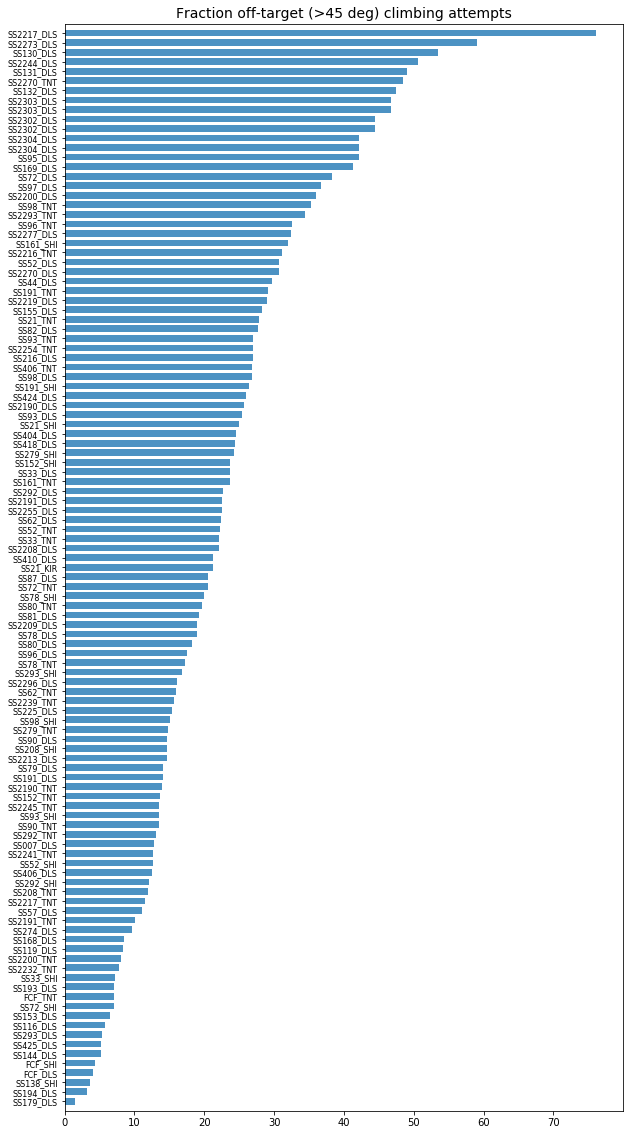

In [349]:
fig, axs = plt.subplots(1,1, figsize=(10,20))

axs.barh(np.arange(ngts), offTargetClimbAttempts_inc, 0.7, alpha=0.8)
plt.yticks(np.arange(ngts), offTargetClimbLine_inc, fontsize=8)
axs.set_title('Fraction off-target (>{} deg) climbing attempts'.format(offtarget_ang), fontsize=14);
axs.set_ylim(-1, ngts)

In [350]:
#fig, axs = plt.subplots(1,1, figsize=(10,20))
#axs.barh(np.arange(ngts), offtarget_attempts, 0.7, alpha=0.8)
#plt.yticks(np.arange(ngts), driverList, fontsize=8)
#axs.set_title('Fraction off-target (>45 deg) climbing attempts', fontsize=14);
#axs.set_ylim(-1, ngts)

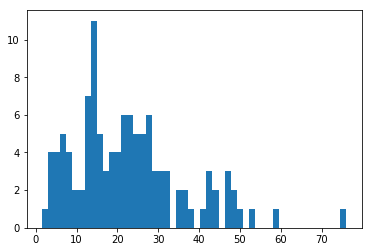

In [352]:
plt.hist(offtarget_attempts, bins=50);

In [140]:
for genotype in range(ngts):
    if offtarget_attempts[genotype] >= 20:
        print('{}, n={}'.format(matdata[genotype][0] [0][0],len(matdata[genotype][0][5])))


SS21_SHI, n=144
SS21_KIR, n=118
SS21_TNT, n=140
SS33_DLS, n=59
SS33_TNT, n=95
SS44_DLS, n=81
SS52_DLS, n=62
SS52_TNT, n=45
SS62_DLS, n=67
SS72_DLS, n=47
SS72_TNT, n=39
SS78_SHI, n=25
SS82_DLS, n=47
SS87_DLS, n=73
SS93_DLS, n=71
SS93_TNT, n=74
SS95_DLS, n=83
SS96_TNT, n=80
SS97_DLS, n=68
SS98_DLS, n=41
SS98_TNT, n=136
SS130_DLS, n=73
SS131_DLS, n=55
SS132_DLS, n=78
SS152_SHI, n=118
SS155_DLS, n=46
SS161_SHI, n=103
SS161_TNT, n=38
SS169_DLS, n=46
SS191_SHI, n=72
SS191_TNT, n=55
SS216_DLS, n=100
SS279_SHI, n=74
SS292_DLS, n=75
SS404_DLS, n=98
SS406_TNT, n=67
SS410_DLS, n=113
SS418_DLS, n=45
SS424_DLS, n=81
SS2190_DLS, n=39
SS2191_DLS, n=62
SS2200_DLS, n=50
SS2208_DLS, n=68
SS2216_TNT, n=45
SS2217_DLS, n=46
SS2219_DLS, n=69
SS2244_DLS, n=79
SS2254_TNT, n=74
SS2255_DLS, n=71
SS2270_DLS, n=62
SS2270_TNT, n=97
SS2273_DLS, n=44
SS2277_DLS, n=37
SS2293_TNT, n=61
SS2302_DLS, n=54
SS2303_DLS, n=60
SS2304_DLS, n=45
SS2302_DLS, n=54
SS2303_DLS, n=60
SS2304_DLS, n=45


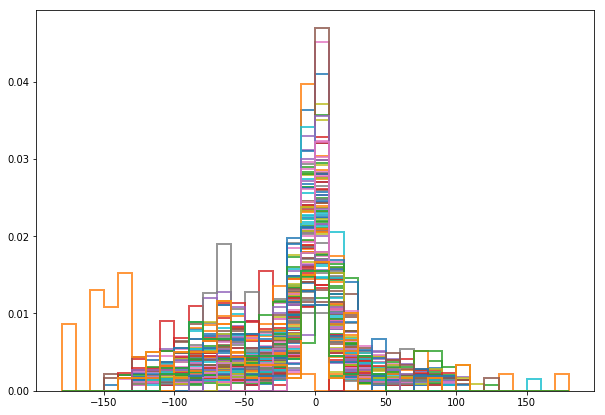

In [21]:
fig, axs = plt.subplots(1,1, figsize=(10,7))

for genotype in range(113): # 0-112
    genotypedata = matdata[genotype][0]
    
    
    plt.hist(genotypedata[7], range=(-180, 180), density=True, histtype='step',
             bins=36, linewidth=2, label=genotypedata[0][0], alpha=0.8)
#plt.legend();

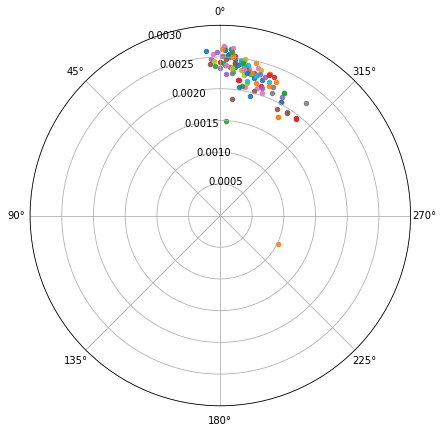

In [25]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='polar')

for genotype in range(113):
    genotypedata = matdata[genotype][0]
    
    n, ed = np.histogram(genotypedata[7], range=(-180, 180), density=True, bins=36)
    
    # Compute areas and colors
    theta, r = circmeanvec(ed[:-1]+np.mean(np.diff(ed))/2, n, high=180, low=-180)
    theta = theta*np.pi/180.0
    colors = theta

    c = ax.scatter(theta, r, s=20, cmap='hsv', alpha=0.9, label=genotypedata[0][0])

ax.set_rlim(0, 0.003)
ax.set_theta_zero_location('N')
#ax.set_thetamin(270)
#ax.set_thetamax(90)

In [165]:
for i in range(10):
    print(len(genotypedata[i]))

1
1
1
128
128
128
128
128
128
128
